# Proyek Kelompok (Capstone) - Certified Data Analyst for Business

## 1. Connect Colab to Google Drive

In [53]:
# Mengkoneksikan colab dengan gdrive
from google.colab import drive
drive.mount('/content/gdrive')
import os

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Import Packages

In [54]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as m
import os
import sqlite3
import statistics as st
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
path = '/content/gdrive/MyDrive/Pentadata/data_schrimp_clean.xlsx'

In [56]:
df = pd.read_excel(path)
df

,Exporter,Product,Origin,Importer,Arrival Date,Month,Year,Pounds,US Port,Foreign Port,...,Vessel,Qty,UOM,Notify Party,Product Type,Product Desc,UMDesc,Transshipped,Foreign Destination,BOL Number Hashed
0,1227,SHRIMP,INDIA,1880,10/31/2022,Oct,2022,"56,217",NEW YORK,Mundra,...,MSC RIKKU,"1,700",CTN,514,7,PENAEUS MON ODON FARM RAISED FDA R EGISTR,CARTON,0.0,NaN,04839d4ad01ae1a6e5f84961960a033c581af1207bfe8d...
1,1227,SHRIMP,INDIA,655,2/1/2024,Feb,2024,"51,380",NEWARK,Colombo,...,MSC PAMELA,"2,700",CTN,514,7,NAME: PENAEUS MONODON SHIPING MARK: IFFT/PO/0,CARTON,0.0,NaN,f42fd8ef090b51fc41d8ab175f9450b79d289dfa3c15ef...
2,1227,SHRIMP,INDIA,655,12/9/2023,Dec,2023,"51,380",NEWARK,Mundra,...,MSC SILVIA,"2,700",CTN,514,7,"S, N W/NC BRAND: NAVIK'S LA TIN NAME: PENAEUS",CARTON,0.0,NaN,c555c9289f7ce935381b0c1396e4e8b15a13dc6c3f3859...
3,1227,SHRIMP,INDIA,1880,10/5/2023,Oct,2023,"47,002",NEWARK,Mundra,...,AMERICA,"2,150",CTN,193,7,PENAEUS MONODON SHIPING MARK: 23614 F DA,CARTON,0.0,NaN,a2091632cffe4162949270fe4138478b3ee4dd399909ee...
4,1227,SHRIMP,INDIA,1880,11/16/2022,Nov,2022,"48,501",NEW YORK,Mundra,...,MSC MUMBAI VIII,"2,000",CTN,514,7,TOPENAEU S VANNAMEI FARM RAISED FDA REGISTR,CARTON,0.0,NaN,7eb658592beed235e1b81bc57693e3dec2c00a508abda0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186724,503,SHRIMP,INDIA,765,May 2023,May,2023,130841,NaN,NaN,...,NaN,NaN,NaN,1832,8,NaN,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
186725,503,SHRIMP,INDIA,765,Jun 2023,Jun,2023,94578,NaN,NaN,...,NaN,NaN,NaN,1832,8,NaN,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
186726,503,SHRIMP,INDIA,765,Jul 2023,Jul,2023,88736,NaN,NaN,...,NaN,NaN,NaN,1832,8,NaN,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...
186727,503,SHRIMP,INDIA,765,Dec 2023,Dec,2023,41336,NaN,NaN,...,NaN,NaN,NaN,1832,8,NaN,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...


# ***3. CLEANSING & MANIPULATION***

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186729 entries, 0 to 186728
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Exporter             186729 non-null  int64  
 1   Product              186729 non-null  object 
 2   Origin               186729 non-null  object 
 3   Importer             186729 non-null  int64  
 4   Arrival Date         186729 non-null  object 
 5   Month                186729 non-null  object 
 6   Year                 186729 non-null  int64  
 7   Pounds               186729 non-null  object 
 8   US Port              177455 non-null  object 
 9   Foreign Port         177455 non-null  object 
 10  ULTPort              177455 non-null  object 
 11  Shipping Line        177455 non-null  object 
 12  Vessel               177128 non-null  object 
 13  Qty                  177455 non-null  object 
 14  UOM                  177455 non-null  object 
 15  Notify Party     

**Cek Missing Value**

In [58]:
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

Exporter                    0
Product                     0
Origin                      0
Importer                    0
Arrival Date                0
Month                       0
Year                        0
Pounds                      0
US Port                  9274
Foreign Port             9274
ULTPort                  9274
Shipping Line            9274
Vessel                   9601
Qty                      9274
UOM                      9274
Notify Party                0
Product Type                0
Product Desc             9275
UMDesc                   9276
Transshipped             9274
Foreign Destination    186728
BOL Number Hashed           0
dtype: int64

### ***MENGATASI MISSING VALUE***

**A. Melakukan Drop Missing Value Pada**

1.   kolom US Port dan Foreign Destination
2.   baris dengan nilai Kosong




In [59]:
df = df.dropna(subset=['US Port'])

In [60]:
# Menghapus kolom `Foreign Destination`
df = df.drop(columns=['Foreign Destination'])

# Menghapus semua baris dengan nilai yang hilang
df = df.dropna(subset=['UMDesc','Product Desc'])

**B. Mengganti Nilai NaN pada kolom Vessel menjadi Unknown** : Cara ini lebih efisien untuk menghilangkan Missing Value pada kolom penting seperti vessel dengan Missng Value cukup banyak.

In [61]:
# Mengganti nilai NaN dengan "Unknown" pada kolom "Vessel"
df['Vessel'] = df['Vessel'].fillna('Unknown')

In [62]:
jumlah_missing = pd.isnull(df).sum()
jumlah_missing

Exporter             0
Product              0
Origin               0
Importer             0
Arrival Date         0
Month                0
Year                 0
Pounds               0
US Port              0
Foreign Port         0
ULTPort              0
Shipping Line        0
Vessel               0
Qty                  0
UOM                  0
Notify Party         0
Product Type         0
Product Desc         0
UMDesc               0
Transshipped         0
BOL Number Hashed    0
dtype: int64

In [63]:
# Mencari apakah ada nilai 0
nolpounds = (df['Pounds'] == 0).any()
nolpounds

# Mencari apakah ada nilai 0
nolqty = (df['Qty'] == 0).any()
nolqty

print(nolpounds)
print(nolqty)

False
False


# **Mengubah Type Data**

1. Mengubah Integer menjadi String (Exporter, Importer, Notify Party)
2. Mengubah String menjadi Datetime (Arrival Date)
3. Mengubah Object menjadi Integer (Pounds dan Qty)

In [64]:
# Mengubah integer menjadi string
mengubah_int = ['Exporter','Importer','Notify Party']
for cc in mengubah_int :
  df[cc] = df[cc].astype(str)

# Mengubah string menjadi datetime
mengubah_date = ['Arrival Date']
for cc in mengubah_date :
  df[cc] = pd.to_datetime(df[cc])

#mengubah object menjadi interger
df['Pounds'] = df['Pounds'].str.replace(',', '').astype(int)
df['Qty'] = df['Qty'].str.replace(',', '').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177452 entries, 0 to 177454
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Exporter           177452 non-null  object        
 1   Product            177452 non-null  object        
 2   Origin             177452 non-null  object        
 3   Importer           177452 non-null  object        
 4   Arrival Date       177452 non-null  datetime64[ns]
 5   Month              177452 non-null  object        
 6   Year               177452 non-null  int64         
 7   Pounds             177452 non-null  int64         
 8   US Port            177452 non-null  object        
 9   Foreign Port       177452 non-null  object        
 10  ULTPort            177452 non-null  object        
 11  Shipping Line      177452 non-null  object        
 12  Vessel             177452 non-null  object        
 13  Qty                177452 non-null  int64        

## ***CEK DUPLICATE***

In [65]:
# Mengidentifikasi apakah terdapat duplicate value pada tabel
df.duplicated().any()

False

## ***HANDLING OUTLIER***

In [66]:
df.describe()

,Arrival Date,Year,Pounds,Qty,Product Type,Transshipped
count,177452,177452.000000,177452.000000,177452.000000,177452.000000,177452.0
mean,2021-05-05 05:37:30.821630720,2020.844504,42548.020580,2069.555654,6.993638,0.0
min,2018-01-01 00:00:00,2018.000000,4.000000,1.000000,0.000000,0.0
25%,2019-11-12 00:00:00,2019.000000,39154.000000,1333.000000,7.000000,0.0
50%,2021-06-24 00:00:00,2021.000000,42037.000000,1727.500000,7.000000,0.0
75%,2022-10-17 00:00:00,2022.000000,46032.000000,3153.000000,7.000000,0.0
max,2024-04-30 00:00:00,2024.000000,296031.000000,111548.000000,8.000000,0.0
std,NaN,1.790475,7583.740558,1047.870687,0.165694,0.0


In [67]:
def detect_outliers_iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in df if x < lower_bound or x > upper_bound]
    return outliers

#Deteksi outlier dengan IQR
Qty_outliers = detect_outliers_iqr(list(df.Qty))
print("Outliers from IQR method: ", Qty_outliers)

Outliers from IQR method:  [15076, 9097, 10483, 8828, 9300, 9844, 14476, 6000, 6000, 7095, 7000, 6495, 7014, 6995, 6600, 6237, 6237, 6237, 6237, 6237, 6200, 6200, 6200, 6200, 6200, 6200, 6200, 6200, 6200, 6085, 5995, 6500, 7830, 6055, 7920, 7920, 7920, 12600, 6500, 6500, 6500, 7100, 6500, 8250, 6500, 6500, 6448, 6448, 6448, 6500, 6260, 6448, 6448, 6500, 6500, 6448, 6448, 6800, 6800, 6613, 6400, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6800, 6765, 6800, 6400, 6400, 6400, 10400, 6552, 6593, 6425, 6353, 6000, 8620, 6514, 7656, 6153, 6646, 5978, 7299, 6044, 6310, 6812, 6460, 6646, 7280, 6092, 6596, 7260, 6988, 5920, 5900, 5970, 8338, 8234, 8190, 8620, 6424, 6710, 6700, 7920, 7920, 7920, 7920, 6412, 8864, 7560, 6000, 6200, 8250, 6000, 6200, 13300, 13300, 7064, 6552, 7790, 7790, 5960, 7008, 13810, 6375, 6375, 6500, 6805, 6500, 6500, 6991, 15076, 6983, 5900, 7920, 7498, 8864, 6400, 6034, 7830, 12600, 12000, 12600, 12600, 12600, 12600, 12600, 6500, 6500, 6500, 6500, 6000, 60

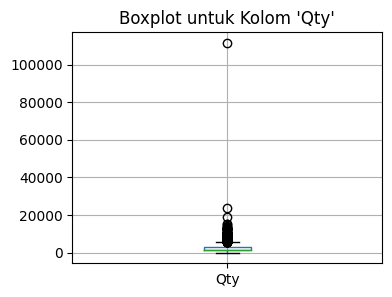

In [68]:
# Mtode boxplot mengecek kolom 'Qty'
plt.figure(figsize=(4, 3))
df.boxplot(column=['Qty'])
plt.title("Boxplot untuk Kolom 'Qty'")
plt.show()

**Mengatasi Outlier dengan Batas Atas dan Batas Bawah, yaitu mengganti nilai Outlier berdasarkan batas atas dan bawah**

### ***A. QTY***

In [69]:
def detect_outliers_iqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound
# Deteksi outlier dengan IQR
lower_bound, upper_bound = detect_outliers_iqr(list(df['Qty']))
print("Lower Bound: ", lower_bound)
print("Upper Bound: ", upper_bound)

# Menggantikan nilai yang di bawah batas bawah dengan batas bawah
df.loc[df['Qty'] < lower_bound, 'Qty'] = lower_bound

# Menggantikan nilai yang di atas batas atas dengan batas atas
df.loc[df['Qty'] > upper_bound, 'Qty'] = upper_bound

Lower Bound:  -1397.0
Upper Bound:  5883.0


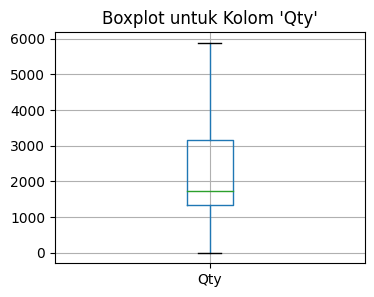

In [70]:
# Buat boxplot untuk kolom 'Qty'
plt.figure(figsize=(4, 3))
df.boxplot(column=['Qty'])
plt.title("Boxplot untuk Kolom 'Qty'")
plt.show()

### ***B. POUNDS***

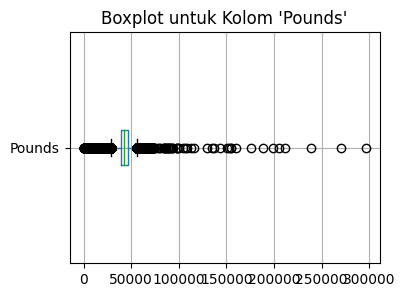

In [71]:
# Mtode boxplot mengecek kolom 'Pounds'
plt.figure(figsize=(4, 3))
df.boxplot(column=['Pounds'], vert=False)
plt.title("Boxplot untuk Kolom 'Pounds'")
plt.show()

In [72]:
def detect_outliers_iqr(df):
    q1 = np.percentile(df, 25)
    q3 = np.percentile(df, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in df if x < lower_bound or x > upper_bound]
    return outliers

#Deteksi outlier dengan IQR
Pounds_outliers = detect_outliers_iqr(list(df.Pounds))
print("Outliers from IQR method: ", Pounds_outliers)

Outliers from IQR method:  [26984, 5922, 5922, 5922, 6581, 16534, 16534, 16534, 16534, 66116, 57534, 64727, 64771, 64639, 64661, 64661, 64661, 64176, 64529, 64097, 9242, 58096, 59862, 26554, 25055, 21936, 21484, 20763, 20602, 12024, 5776, 5776, 5776, 5776, 5774, 5686, 18036, 16598, 16802, 19308, 5536, 5534, 5516, 5774, 902, 902, 20690, 57708, 57708, 57798, 63034, 56471, 56436, 56391, 56996, 56819, 56802, 61594, 57560, 28190, 28435, 27039, 27039, 27227, 26585, 26235, 28726, 27388, 27476, 27743, 27743, 27646, 27957, 28038, 28300, 28362, 28453, 28243, 28091, 28580, 28550, 28543, 18298, 18188, 15719, 21385, 21826, 21826, 22231, 22147, 22917, 23450, 24004, 24786, 25871, 25842, 25836, 56548, 56438, 59965, 27075, 61394, 63007, 63272, 63272, 58091, 58091, 58129, 58246, 56438, 56504, 17361, 17306, 19852, 58036, 57584, 58510, 58102, 60269, 56458, 21753, 20357, 59833, 67373, 67681, 67681, 57871, 14881, 60964, 11889, 16491, 16490, 16490, 26632, 26587, 12169, 27066, 27066, 27066, 27066, 27066, 2706

In [73]:
x = len(Pounds_outliers) / len(df['Pounds'])
print('Proporsi outlier pada Pounds sebesar', x*100, '%')

Proporsi outlier pada Pounds sebesar 7.3693167729864975 %


In [74]:
def detect_outliers_iqr_1(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound_1 = q1 - 1.5 * iqr
    upper_bound_1 = q3 + 1.5 * iqr
    return lower_bound_1, upper_bound_1
# Deteksi outlier dengan IQR
lower_bound_1, upper_bound_1 = detect_outliers_iqr_1(list(df['Pounds']))
print("Lower Bound: ", lower_bound_1)
print("Upper Bound: ", upper_bound_1)

# Menggantikan nilai yang di bawah batas bawah dengan batas bawah
df.loc[df['Pounds'] < lower_bound_1, 'Pounds'] = lower_bound_1

# Menggantikan nilai yang di atas batas atas dengan batas atas
df.loc[df['Pounds'] > upper_bound_1, 'Pounds'] = upper_bound_1

Lower Bound:  28837.0
Upper Bound:  56349.0


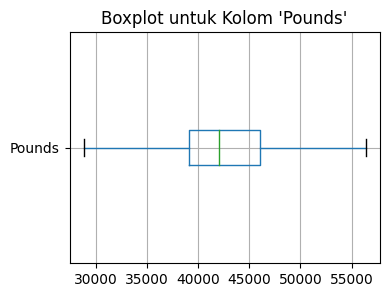

In [75]:
# Mtode boxplot mengecek kolom 'Pounds'
plt.figure(figsize=(4, 3))
df.boxplot(column=['Pounds'], vert=False)
plt.title("Boxplot untuk Kolom 'Pounds'")
plt.show()

In [76]:
df.to_csv('data_shrimp.csv', index=False)

# ***EDA***

**Problem Statement**

1. Berapa rata-rata berat udang yang diekspor/diimpor per Negara pengekspor/impor?
2. Bagaimana performa ekspor/impor tiap perusahaan?
3. Apakah ada tren dalam jumlah udang yang diekspor/diimpor selama bulan atau tahun yang berbeda?
4. Bagaimana berat dan jumlah udang bervariasi berdasarkan jenis atau kategori produk yang berbeda?
5. Analisa lebih lanjut untuk spesies udang Vaname.

## **Case 1**

### **Menjadikan satu nama-nama negara yang sama :**


1.   Thailand >> THAILAND
2.   Vietnam >> VIETNAM
2.   India >> INDIA




In [77]:
# Ubah semua entri "Thailand" menjadi "THAILAND" dalam kolom 'Origin'
df['Origin'] = df['Origin'].replace('Thailand', 'THAILAND')
# Ubah semua entri "Vietnam" menjadi "VIETNAM" dalam kolom 'Origin'
df['Origin'] = df['Origin'].replace('Vietnam', 'VIETNAM')
# Ubah semua entri "India" menjadi "INDIA" dalam kolom 'Origin'
df['Origin'] = df['Origin'].replace('India', 'INDIA')

In [78]:
# Menghitung rata-rata berat udang yang diekspor/impor per negara pengekspor/pengimpor
average_exporter = df.groupby('Origin')['Pounds'].mean()
# Konversi hasil ke dalam DataFrame
average_exporter_df = pd.DataFrame(average_exporter)
average_exporter_df

,Pounds
Origin,
ECUADOR,44359.672067
INDIA,45301.906152
INDONESIA,41536.385830
THAILAND,37646.306637
VIETNAM,39961.833679


In [79]:
#Visulaisi dengan Plotly
import plotly.express as px
fig = px.bar(average_exporter, title='Rata-rata Berat Udang yang Diimpor per Negara')
fig.update_layout(width=600, height=400)  # Mengatur lebar dan tinggi dalam piksel
fig.show()

**INDIA adalah negara pengimpor yang memiliki berat rata - rata impor udang paling besar.**

# ***CASE 2***

In [80]:
# Performa ekspor/impor tiap perusahaan (dianggap sebagai kolom Importer)
performance_by_company = df.groupby('Importer')['Pounds'].sum().reset_index()
print("Performa ekspor/impor tiap perusahaan:")
print(performance_by_company)

Performa ekspor/impor tiap perusahaan:
     Importer  Pounds
0           0   48777
1           1   28837
2          10   48043
3         100   46297
4        1000   40404
...       ...     ...
1865      995  181923
1866      996   43592
1867      997  267471
1868      998   33951
1869      999   40404

[1870 rows x 2 columns]


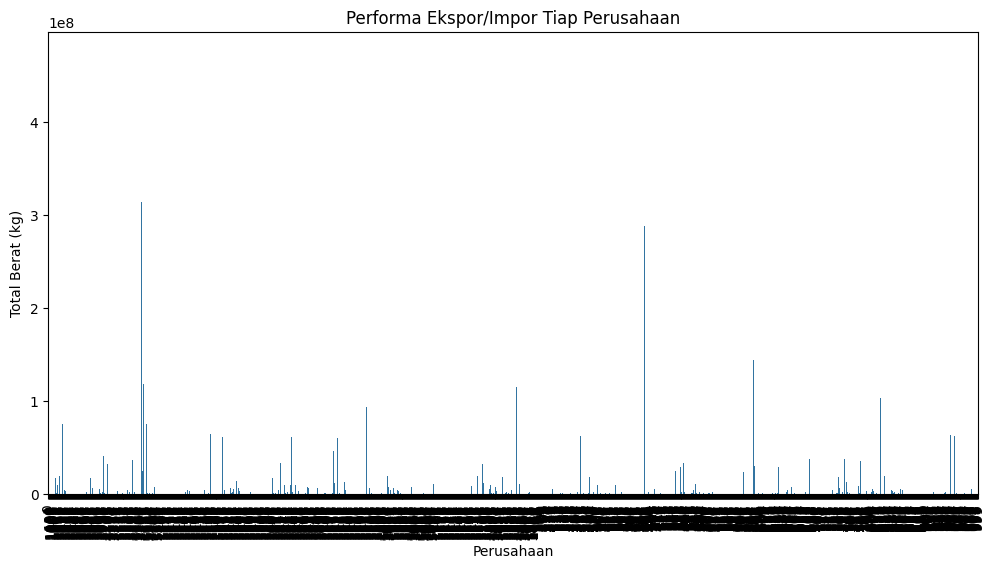

In [81]:
# Visualisasi performa ekspor/impor tiap perusahaan
plt.figure(figsize=(12, 6))
sns.barplot(x='Importer', y='Pounds', data=performance_by_company)
plt.title('Performa Ekspor/Impor Tiap Perusahaan')
plt.xlabel('Perusahaan')
plt.ylabel('Total Berat (kg)')
plt.xticks(rotation=90)
plt.show()

In [82]:
count_by_country = df.groupby('Origin').size().reset_index(name='Count')
# Membuat visualisasi bar chart dari count_by_country
fig = px.bar(count_by_country, x='Origin', y='Count', title='Jumlah Udang yang Diimpor per Negara')

# Menetapkan ukuran gambar
fig.update_layout(width=600, height=400)

# Menampilkan gambar
fig.show()

**Frekuensi Impor Negara paling banyak adalah Indonesia**

# ***CASE 3***

==================

In [83]:
# Mengelompokkan data berdasarkan bulan dan menghitung total berat per bulan
total_bulan = df.groupby('Month')['Pounds'].sum()

# Mengelompokkan data berdasarkan tahun dan menghitung total berat per tahun
total_tahun = df.groupby('Year')['Pounds'].sum()

# Menampilkan hasil total berat per bulan
print("\nTotal berat udang per bulan:")
print(total_bulan)

# Menampilkan hasil total berat per tahun
print("\nTotal berat udang per tahun:")
print(total_tahun)


Total berat udang per bulan:
Month
Apr    636617913
Aug    703823724
Dec    616960339
Feb    587106187
Jan    692635353
Jul    615127300
Jun    565007481
Mar    659692977
May    574955887
Nov    606874624
Oct    700527731
Sep    619526516
Name: Pounds, dtype: int64

Total berat udang per tahun:
Year
2018    1016210894
2019    1003898263
2020    1106354288
2021    1434157326
2022    1359708922
2023    1229600423
2024     428925916
Name: Pounds, dtype: int64


DataFrame setelah diolah:
   Bulan-Tahun     Pounds
0   2018-01-01   88412133
1   2018-02-01   75539069
2   2018-03-01   71017502
3   2018-04-01   79696542
4   2018-05-01   76111882
..         ...        ...
71  2023-12-01  102208817
72  2024-01-01   97016080
73  2024-02-01  103250309
74  2024-03-01  116453128
75  2024-04-01  112206399

[76 rows x 2 columns]


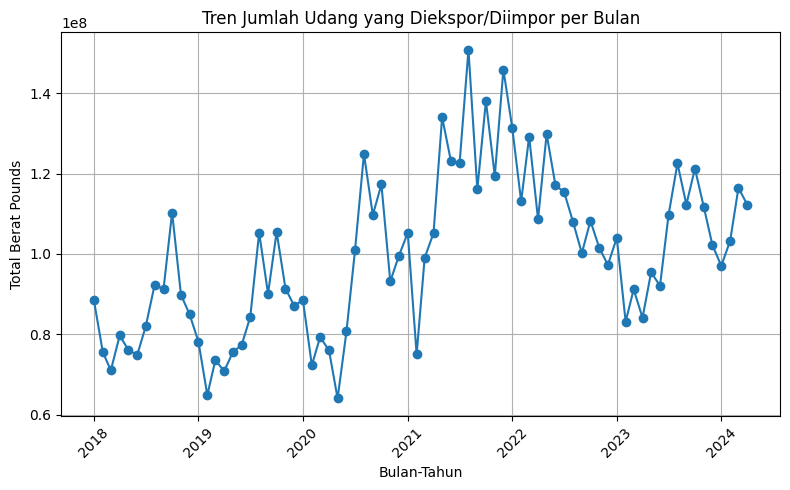

In [84]:
# Menambah kolom 'Bulan-Tahun' untuk agregasi bulanan
df['Bulan-Tahun'] = df['Arrival Date'].dt.to_period('M')

# Mengelompokkan data berdasarkan 'Bulan-Tahun' dan menghitung total berat per bulan
total_bulan = df.groupby('Bulan-Tahun')['Pounds'].sum().reset_index()

# Mengubah 'Bulan-Tahun' kembali menjadi datetime untuk plotting
total_bulan['Bulan-Tahun'] = total_bulan['Bulan-Tahun'].dt.to_timestamp()

# Menampilkan DataFrame yang telah diolah
print("DataFrame setelah diolah:")
print(total_bulan)

# Membuat grafik timeseries
plt.figure(figsize=(8, 5))
plt.plot(total_bulan['Bulan-Tahun'], total_bulan['Pounds'], marker='o', linestyle='-')
plt.title('Tren Jumlah Udang yang Diekspor/Diimpor per Bulan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Berat Pounds')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [85]:
warnings.filterwarnings('ignore')

In [86]:
# Uji stasioneritas menggunakan Augmented Dickey-Fuller Test
result = adfuller(total_bulan['Pounds'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretasi hasil ADF test
if result[1] > 0.05:
    print("Data tidak stasioner. Perlu differencing.")
else:
    print("Data stasioner.")

ADF Statistic: -1.521256
p-value: 0.522971
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
Data tidak stasioner. Perlu differencing.


In [87]:
# Mengatur kolom 'Bulan-Tahun' sebagai index
total_bulan.set_index('Bulan-Tahun', inplace=True)

# Membuat model SARIMA
model = SARIMAX(total_bulan, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

# Melatih model
model_fit = model.fit(disp=False)

# Melakukan forecasting untuk 12 bulan ke depan
forecast = model_fit.get_forecast(steps=12)
forecast_index = pd.date_range(start=total_bulan.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
forecast_series = pd.Series(forecast.predicted_mean.values, index=forecast_index)

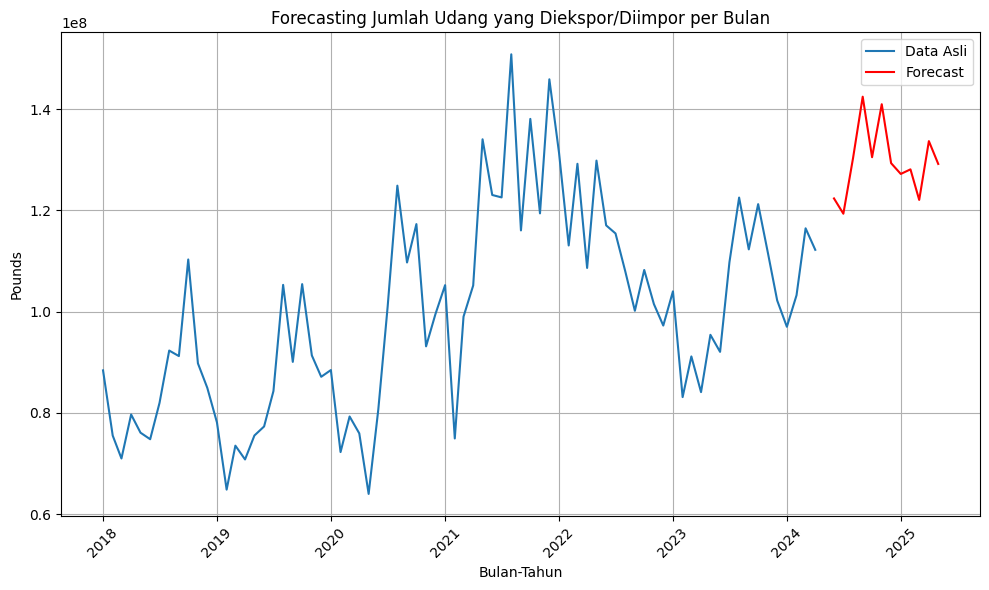

In [88]:
# Plot data asli dan hasil forecasting
plt.figure(figsize=(10, 6))
plt.plot(total_bulan, label='Data Asli')
plt.plot(forecast_series, label='Forecast', color='red')
plt.title('Forecasting Jumlah Udang yang Diekspor/Diimpor per Bulan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Pounds')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [89]:
forecast_series

2024-05-31    1.223504e+08
2024-06-30    1.193352e+08
2024-07-31    1.302976e+08
2024-08-31    1.424336e+08
2024-09-30    1.304899e+08
2024-10-31    1.409447e+08
2024-11-30    1.293120e+08
2024-12-31    1.271839e+08
2025-01-31    1.280931e+08
2025-02-28    1.220592e+08
2025-03-31    1.336634e+08
2025-04-30    1.291588e+08
Freq: M, dtype: float64

# ***CASE 4 Bagaimana berat dan jumlah udang bervariasi berdasarkan jenis atau kategori produk yang berbeda?***

**BERAT** : POUNDS

**JUMLAH barang tiap unit untuk sekali penjualan**: QTY

**BERDASARKAN JENIS** : PRODUK

**KATEGORI PRODUK** : PRODUCT TYPE

In [90]:
# Membuat data frame baru hanya dengan kolom 'Product' dan 'Pounds'
df_product = df[['Product Type', 'Pounds']]

**Berat (Pounds)**

In [91]:
# Jumlah berat udang vannamei tiap tipe
df_product = df_product.groupby('Product Type')['Pounds'].agg(['sum', 'mean', 'count'])
print('Jumlah berat udang vannamei tiap product type:')
df_product

Jumlah berat udang vannamei tiap product type:


,sum,mean,count
Product Type,,,
0,34619,34619.000000,1
1,3121096,47289.333333,66
2,56349,56349.000000,1
3,3071185,47249.000000,65
4,6606056,43748.715232,151
5,195140,32523.333333,6
6,28837,28837.000000,1
7,7565496865,42705.281588,177156
8,245885,49177.000000,5


**Jumlah (Qty) UOM**

In [92]:
# Replace 'BLE' with 'BAL' in the 'UOM' column
df['UOM'] = df['UOM'].replace('BLE', 'BAL')

In [93]:
# Ambil nilai unik dari kolom 'UOM' dari DataFrame yang sudah difilter (shrimp_data)
unique_uom = df['UOM'].unique()
unique_uom

array(['CTN', 'PCS', 'BOX', 'CAS', 'PKG', 'BAG', 'TRY', 'BLK', 'AMM',
       'CAG', 'DRM', 'BDL', 'PLT', 'UNT', 'TBN', 'CRT', 'CAR', 'PAL',
       'CNT', 'CBY', 'BAL', 'TNK'], dtype=object)

In [94]:
# Create a dictionary to store the frequency of each UOM within a Product Type
product_type_uom_freq = {}
for product_type in df['Product Type'].unique():
  product_type_uom_freq[product_type] = df[df['Product Type'] == product_type]['UOM'].value_counts().to_dict()

# Print the frequency of each UOM within a Product Type
for product_type, uom_freq in product_type_uom_freq.items():
  print(f"Product Type: {product_type}")
  for uom, count in uom_freq.items():
    print(f"\tUOM: {uom}, Frequency: {count}")

Product Type: 7
	UOM: CTN, Frequency: 118463
	UOM: CAS, Frequency: 30214
	UOM: PCS, Frequency: 21982
	UOM: BOX, Frequency: 5517
	UOM: PKG, Frequency: 788
	UOM: UNT, Frequency: 66
	UOM: BDL, Frequency: 38
	UOM: TNK, Frequency: 17
	UOM: DRM, Frequency: 14
	UOM: BAG, Frequency: 13
	UOM: TRY, Frequency: 10
	UOM: TBN, Frequency: 9
	UOM: CNT, Frequency: 4
	UOM: BAL, Frequency: 4
	UOM: CAG, Frequency: 3
	UOM: CRT, Frequency: 3
	UOM: CBY, Frequency: 3
	UOM: AMM, Frequency: 2
	UOM: PLT, Frequency: 2
	UOM: CAR, Frequency: 2
	UOM: BLK, Frequency: 1
	UOM: PAL, Frequency: 1
Product Type: 1
	UOM: CTN, Frequency: 34
	UOM: PCS, Frequency: 31
	UOM: CAS, Frequency: 1
Product Type: 3
	UOM: PCS, Frequency: 54
	UOM: CAS, Frequency: 6
	UOM: CTN, Frequency: 5
Product Type: 4
	UOM: CTN, Frequency: 93
	UOM: CAS, Frequency: 52
	UOM: PCS, Frequency: 6
Product Type: 0
	UOM: PCS, Frequency: 1
Product Type: 8
	UOM: PCS, Frequency: 4
	UOM: CTN, Frequency: 1
Product Type: 5
	UOM: CTN, Frequency: 5
	UOM: PCS, Frequenc

**Dari Frequency diketahui bahwa**


1.   Product Type 7 memiliki jenis UOM 22, dengan jenis UOM paling banyak CTN
2.   Product Type 0,6, dan 2 hanya memiliki 1 jenis UOM dan 1 penjualan berdasarkan type


In [95]:
# Group by both 'UMDesc' and 'UOM' and sum 'Qty'
grouped_uom2 = df.groupby(['Product Type','UMDesc'])['Qty'].sum().reset_index()
grouped_uom2

,Product Type,UMDesc,Qty
0,0,PIECES,1865
1,1,CARTON,68819
2,1,CASE,2000
3,1,PIECES,88661
4,2,BAG,20
5,3,CARTON,8206
6,3,CASE,10801
7,3,PIECES,117809
8,4,CARTON,248042
9,4,CASE,151667


In [96]:
# Find the row index with the highest sum of 'Qty' for each 'Product Type'
max_qty_index_per_type = grouped_uom2.groupby('Product Type')['Qty'].idxmax()

# Select the rows with the maximum sum of 'Qty' for each 'Product Type'
max_qty_uom_per_type = grouped_uom2.loc[max_qty_index_per_type, ['Product Type', 'Qty', 'UMDesc']]

max_qty_uom_per_type

,Product Type,Qty,UMDesc
0,0,1865,PIECES
3,1,88661,PIECES
4,2,20,BAG
7,3,117809,PIECES
8,4,248042,CARTON
11,5,9300,CARTON
13,6,2860,PIECES
23,7,247218177,CARTON
37,8,12050,PIECES


**Diatas merupakan Qty UOM terbanyak untuk setiap type product**

In [97]:
# Mengelompokkan kembali berdasarkan 'Product Type' untuk menghitung total 'Qty' per 'Product Type'
total_qty_per_product_type = grouped_uom2.groupby('Product Type')['Qty'].sum().reset_index()
total_qty_per_product_type

,Product Type,Qty
0,0,1865
1,1,159480
2,2,20
3,3,136816
4,4,414533
5,5,10300
6,6,2860
7,7,365870373
8,8,17933


**Jumlah Variasi udang berdasarkan Kategori jenis udang diketahui bahwa dari keseluruhan Qty per type productnya , type product 7 memiliki total Qty / jumlah Unit Ekspor paling besar**

### ***Analisa Produk Lebih Lanjut***

In [98]:
product_counts = df.groupby(['Product', 'Product Type']).size().reset_index(name='Count')
product_counts

,Product,Product Type,Count
0,"CATFISH, FISH, PANGASIUS, SHRIMP",1,1
1,"CLAM, CUTTLEFISH, SNAIL, ANCHOVY, SHRIMP, MOON...",7,1
2,"CLAM, CUTTLEFISH, SNAIL, SHRIMP, FISH",7,1
3,"CLAM, OTHER, LOLIGO, SQUID, YELLOWTAIL, SHRIMP",7,1
4,"CLAM, SHRIMP",7,9
...,...,...,...
270,"SQUID, PARROTFISH, SILLAGO, CLAM, CRABMEAT, SH...",7,1
271,"SWAI, SHRIMP",1,1
272,"TILAPIA, ANCHOVY, SHRIMP",1,1
273,"TILAPIA, SHRIMP",1,1


In [99]:
most_frequent_product = product_counts.loc[product_counts['Count'].idxmax()]
most_frequent_product

Product         SHRIMP
Product Type         7
Count           170924
Name: 69, dtype: object

# ***CASE 5 (VANNAMEI ONLY)***

## Kolom baru **'Vannamei Shrimp'**

Kolom baru **'Vannamei Shrimp'** digunakan untuk menampilkan "Vannamei" pada Produk Description yang berjenis udang Vannamei, dan "Non-Vannamei" pada Product Desc yang tidak berjenis udang Vannamei.

In [100]:
# Membuat kolom baru 'Vanname Shrimp'
keywords = ['VANNAMEI', 'VANAMEI', 'ANNAMEI', 'ANAMEI', 'WHITE SHRIMP', 'WHITELEG']
df['Vanname Shrimp'] = df['Product Desc'].str.contains('|'.join(keywords), case=False)
# Mengganti nilai True dengan 'Vannamei' di dalam kolom 'Vanname Shrimp'
df['Vanname Shrimp'] = df['Vanname Shrimp'].replace(True, 'Vannamei')
# Mengganti nilai False dengan 'Non-Vannamei' di dalam kolom 'Vanname Shrimp'
df['Vanname Shrimp'] = df['Vanname Shrimp'].replace(False, 'Non-Vannamei')

**Keyword ['VANNAMEI', 'VANAMEI', 'ANNAMEI', 'ANAMEI', 'WHITE SHRIMP', 'WHITELEG']**, ditujukan pada jenis udang Vannamei yang penamaannya berbeda - beda.

In [101]:
df.head()

,Exporter,Product,Origin,Importer,Arrival Date,Month,Year,Pounds,US Port,Foreign Port,...,Qty,UOM,Notify Party,Product Type,Product Desc,UMDesc,Transshipped,BOL Number Hashed,Bulan-Tahun,Vanname Shrimp
0,1227,SHRIMP,INDIA,1880,2022-10-31,Oct,2022,56217,NEW YORK,Mundra,...,1700,CTN,514,7,PENAEUS MON ODON FARM RAISED FDA R EGISTR,CARTON,0.0,04839d4ad01ae1a6e5f84961960a033c581af1207bfe8d...,2022-10,Non-Vannamei
1,1227,SHRIMP,INDIA,655,2024-02-01,Feb,2024,51380,NEWARK,Colombo,...,2700,CTN,514,7,NAME: PENAEUS MONODON SHIPING MARK: IFFT/PO/0,CARTON,0.0,f42fd8ef090b51fc41d8ab175f9450b79d289dfa3c15ef...,2024-02,Non-Vannamei
2,1227,SHRIMP,INDIA,655,2023-12-09,Dec,2023,51380,NEWARK,Mundra,...,2700,CTN,514,7,"S, N W/NC BRAND: NAVIK'S LA TIN NAME: PENAEUS",CARTON,0.0,c555c9289f7ce935381b0c1396e4e8b15a13dc6c3f3859...,2023-12,Non-Vannamei
3,1227,SHRIMP,INDIA,1880,2023-10-05,Oct,2023,47002,NEWARK,Mundra,...,2150,CTN,193,7,PENAEUS MONODON SHIPING MARK: 23614 F DA,CARTON,0.0,a2091632cffe4162949270fe4138478b3ee4dd399909ee...,2023-10,Non-Vannamei
4,1227,SHRIMP,INDIA,1880,2022-11-16,Nov,2022,48501,NEW YORK,Mundra,...,2000,CTN,514,7,TOPENAEU S VANNAMEI FARM RAISED FDA REGISTR,CARTON,0.0,7eb658592beed235e1b81bc57693e3dec2c00a508abda0...,2022-11,Vannamei


Membuat Data Frame dari hasil Vannamei

In [102]:
# Membuat DataFrame baru hanya dengan baris yang memiliki nilai 'Vannamei' dalam kolom 'Vanname Shrimp'
vnm_only = df[df['Vanname Shrimp'] == 'Vannamei']
vnm_only.head(3)

,Exporter,Product,Origin,Importer,Arrival Date,Month,Year,Pounds,US Port,Foreign Port,...,Qty,UOM,Notify Party,Product Type,Product Desc,UMDesc,Transshipped,BOL Number Hashed,Bulan-Tahun,Vanname Shrimp
4,1227,SHRIMP,INDIA,1880,2022-11-16,Nov,2022,48501,NEW YORK,Mundra,...,2000,CTN,514,7,TOPENAEU S VANNAMEI FARM RAISED FDA REGISTR,CARTON,0.0,7eb658592beed235e1b81bc57693e3dec2c00a508abda0...,2022-11,Vannamei
5,1227,SHRIMP,INDIA,1880,2022-10-17,Oct,2022,48501,NEWARK,Mundra,...,2000,CTN,514,7,NAEUS VANNAMEI FARM RAISED F DA REGISTRAT,CARTON,0.0,a670906f7c09fb65f4d315a8442a26e0fabc38e9c1ecff...,2022-10,Vannamei
7,1227,SHRIMP,INDIA,819,2018-12-20,Dec,2018,28837,LOS ANGELES,Singapore,...,500,PCS,514,7,VANNAMEI SHRIMPS BLOCK,PIECES,0.0,66b52fa198accd92314b19d1dc5eb8471c7e3c76e92437...,2018-12,Vannamei


**CEK ULANG**

In [103]:
# Menghitung jumlah 'Vannamei'
true_count = (df['Vanname Shrimp'] == 'Vannamei').sum()

# Menampilkan jumlah 'Vannamei'
print(f'Jumlah data Vannamei yang muncul sebanyak {true_count} data.')


Jumlah data Vannamei yang muncul sebanyak 68923 data.


In [104]:
# Print data yang sudah fix clean
df.to_csv('data_shrimp_clean_FIX.csv', index=False)

## ***ORIGIN VANNAMEI***

Negara Asal Pengekspor **Vannamei**

In [105]:
# Hitung jumlah ekspor dari setiap negara asal
country_counts = vnm_only['Origin'].value_counts().sort_values(ascending = False)
print(country_counts)

# Dapatkan negara asal dengan jumlah ekspor terbanyak
most_exported_country = country_counts.idxmax()
total_exports = country_counts.max()
print("Negara dengan jumlah ekspor spesies udang Vannamei terbanyak adalah", most_exported_country, "dengan total", total_exports, "ekspor.")

Origin
INDIA        34235
INDONESIA    14993
VIETNAM       8049
ECUADOR       6146
THAILAND      5500
Name: count, dtype: int64
Negara dengan jumlah ekspor spesies udang Vannamei terbanyak adalah INDIA dengan total 34235 ekspor.


In [106]:
# Hitung rata-rata pounds dari tiap negara asal
vanname_country_pounds = vnm_only.groupby('Origin')['Pounds'].mean()
print(vanname_country_pounds)

# Dapatkan negara asal dengan jumlah ekspor terbanyak
most_pounds_country = vanname_country_pounds.idxmax()
total_pounds = vanname_country_pounds.max()
print("Negara dengan rata-rata berat spesies udang Vannamei terbanyak adalah", most_pounds_country, "dengan rata-rata", total_pounds, "pounds.")

Origin
ECUADOR      45090.773186
INDIA        45727.006017
INDONESIA    43460.639965
THAILAND     38214.782727
VIETNAM      40547.400422
Name: Pounds, dtype: float64
Negara dengan rata-rata berat spesies udang Vannamei terbanyak adalah INDIA dengan rata-rata 45727.00601723383 pounds.


### ***Performa Ekspor/Impor Tiap Perusahaan (Vannamei Only)***

In [107]:
# Performa ekspor/impor tiap perusahaan (dianggap sebagai kolom Importer)
performance_by_company_v = vnm_only.groupby('Importer')['Pounds'].sum().reset_index()
print("Performa ekspor/impor tiap perusahaan:")
print(performance_by_company_v)

Performa ekspor/impor tiap perusahaan:
     Importer    Pounds
0           1     28837
1          10     48043
2        1001     44158
3        1003    282366
4        1005  12485647
...       ...       ...
1078       99    127913
1079      991   1906968
1080      992     45679
1081      994    328618
1082      995    136685

[1083 rows x 2 columns]


In [108]:
# Top 10 importir terbanyak
vnm_only['Importer'].value_counts().head(10)

Importer
267     6081
363     3296
1169    2779
390     2243
139     2237
102     2235
212     2121
247     1945
1180    1438
1851    1384
Name: count, dtype: int64

In [109]:
# Top 10 eksportir terbanyak
vnm_only['Exporter'].value_counts().head(10)

Exporter
741     14298
103      3434
271      3244
359      2749
1029     1416
770      1163
907      1108
237      1015
317       982
625       914
Name: count, dtype: int64



```
# Ini diformat sebagai kode
```

## ***TREN UDANG VANNAMEI***

DataFrame setelah diolah:
   Bulan-Tahun    Pounds
0   2018-01-01  34540101
1   2018-02-01  26740677
2   2018-03-01  25761897
3   2018-04-01  30948771
4   2018-05-01  30444808
..         ...       ...
71  2023-12-01  40977372
72  2024-01-01  32741789
73  2024-02-01  36357271
74  2024-03-01  43691560
75  2024-04-01  42432109

[76 rows x 2 columns]


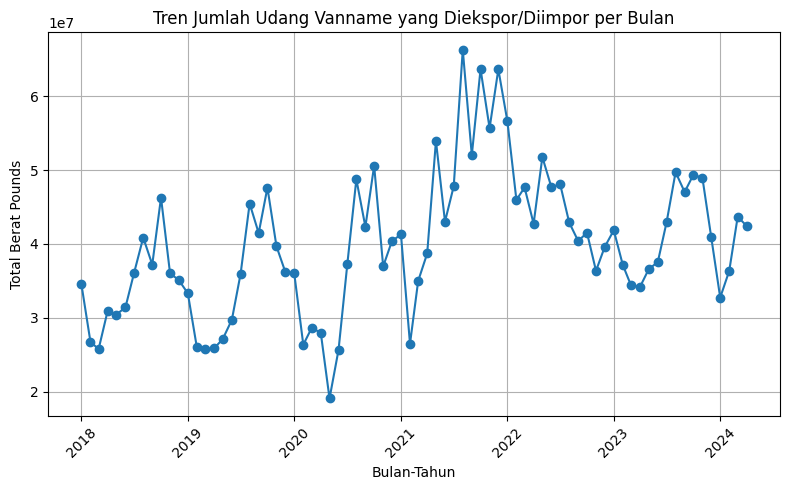

In [110]:
# Mengelompokkan data berdasarkan 'Bulan-Tahun' dan menghitung total berat per bulan
total_bulan1 = vnm_only.groupby('Bulan-Tahun')['Pounds'].sum().reset_index()

# Mengubah 'Bulan-Tahun' kembali menjadi datetime untuk plotting
total_bulan1['Bulan-Tahun'] = total_bulan1['Bulan-Tahun'].dt.to_timestamp()

# Menampilkan DataFrame yang telah diolah
print("DataFrame setelah diolah:")
print(total_bulan1)

# Membuat grafik timeseries
plt.figure(figsize=(8, 5))
plt.plot(total_bulan1['Bulan-Tahun'], total_bulan1['Pounds'], marker='o', linestyle='-')
plt.title('Tren Jumlah Udang Vanname yang Diekspor/Diimpor per Bulan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Berat Pounds')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
country_year = pd.crosstab(vnm_only['Origin'], vnm_only['Year'], values=vnm_only['Pounds'], aggfunc='sum')
country_year

Year,2018,2019,2020,2021,2022,2023,2024
Origin,,,,,,,
ECUADOR,15098314,15661890,32828282,49783957,65167429,63123486,35464534
INDIA,230029790,233795933,183001953,293015106,279271221,269712531,76637517
INDONESIA,86371303,94665089,111803869,136466771,104640922,94364625,23292796
THAILAND,44542565,38871712,40108084,30739543,29224208,21611448,5083745
VIETNAM,35438805,31275249,52289893,77629502,63060559,51927881,14744137


In [112]:
country_year = country_year.reset_index()
country_year_melted = country_year.melt(id_vars='Origin', var_name='Year', value_name='Total Pounds')
fig = px.line(country_year_melted, x='Year', y='Total Pounds', color='Origin',
              title='Total Ekspor Udang Vannamei per Negara dan Tahun',
              labels={'Total Pounds':'Total Pounds', 'Origin':'Origin', 'Year':'Year'},
              markers=True)

# Tampilkan plot
fig.show()

## ***Product Type Analysis***

Berat dan Jumlah Variasi Vannamei

In [113]:
#total_bulan1.to_csv('total_bulan1.csv', index=False)

In [114]:
# Jumlah berat udang vannamei tiap tipe
v_sum_type_pounds = vnm_only.groupby('Product Type')['Pounds'].agg(['sum', 'mean', 'count'])
print('Jumlah berat udang vannamei tiap product type:')
v_sum_type_pounds

Jumlah berat udang vannamei tiap product type:


,sum,mean,count
Product Type,,,
1,1071198,46573.826087,23
3,2172079,47219.108696,46
5,195140,32523.333333,6
6,28837,28837.000000,1
7,3027165713,43970.741710,68845
8,111682,55841.000000,2


In [115]:
# Jumlah Qty berdasarkan product type dan UOM
qty_type_uom = vnm_only.groupby(by = ['Product Type', 'UOM', 'UMDesc'])['Qty'].sum()
qty_type_uom

Product Type  UOM  UMDesc   
1             CTN  CARTON           23218
              PCS  PIECES           34946
3             CTN  CARTON            2000
              PCS  PIECES           98679
5             CTN  CARTON            9300
              PCS  PIECES            1000
6             PCS  PIECES            2860
7             AMM  AMMO PACK         7350
              BAG  BAG               3300
              BDL  BUNDLE           19627
              BOX  BOX             871449
              CAS  CASE           8063949
              CBY  CARBOY            1800
              CNT  CONTAINER         4848
              CRT  CRATE             3450
              CTN  CARTON       112364253
              PCS  PIECES        29734985
              PKG  PACKAGE         679669
              TBN  TOTE BIN            72
8             PCS  PIECES            7000
Name: Qty, dtype: int64

In [116]:
country_type = vnm_only.groupby(['Product Type', 'Origin'])['Pounds'].sum()
country_type

Product Type  Origin   
1             INDONESIA        125596
              VIETNAM          945602
3             INDIA            697071
              THAILAND        1380067
              VIETNAM           94941
5             THAILAND         195140
6             THAILAND          28837
7             ECUADOR       277127892
              INDIA        1564655298
              INDONESIA     651479779
              THAILAND      208577261
              VIETNAM       325325483
8             INDIA            111682
Name: Pounds, dtype: int64

## ***UOM/UMDesc Analysis***

In [117]:
# Jumlah Qty dan Pounds berdasarkan unit pengukuran
sum_umdesc = vnm_only.groupby('UMDesc')[['Qty', 'Pounds']].sum().sort_values(by = 'Qty', ascending = False)
sum_umdesc

,Qty,Pounds
UMDesc,,
CARTON,112398771,2199102386
PIECES,29879470,627728619
CASE,8063949,154621368
BOX,871449,37315443
PACKAGE,679669,10768045
BUNDLE,19627,766554
AMMO PACK,7350,84987
CONTAINER,4848,124695
CRATE,3450,82813


In [118]:
# Analisis berapa pounds tiap 1 qty di vannamei
sum_umdesc['Pounds/Qty'] = sum_umdesc['Pounds'] / sum_umdesc['Qty']
sum_umdesc.sort_values(by = 'Pounds/Qty', ascending = False)

,Qty,Pounds,Pounds/Qty
UMDesc,,,
TOTE BIN,72,68400,950.000000
BOX,871449,37315443,42.819996
BUNDLE,19627,766554,39.056096
CONTAINER,4848,124695,25.720916
CARBOY,1800,45040,25.022222
CRATE,3450,82813,24.003768
PIECES,29879470,627728619,21.008693
CARTON,112398771,2199102386,19.565182
CASE,8063949,154621368,19.174398


**Tambahan Vannamei Analysis**

## ***FOREIGN PORT***

Pelabuhan pengiriman /ekspor dilakukan.



In [119]:
# Hitung jumlah ekspor dari setiap Foreign Port
port_counts = vnm_only['Foreign Port'].value_counts().sort_values(ascending = False)
port_counts.head()

Foreign Port
Singapore          16322
Colombo             9717
Vung Tau            5946
Port Swettenham     4811
Laem Chabang        3275
Name: count, dtype: int64

In [120]:
# Dapatkan Foreign Port dengan jumlah ekspor terbanyak
most_exported_port = port_counts.idxmax()
total_exports = port_counts.max()
print("Foreign Port dengan jumlah ekspor spesies udang Vannamei terbanyak adalah", most_exported_port, "dengan total", total_exports, "ekspor.")

Foreign Port dengan jumlah ekspor spesies udang Vannamei terbanyak adalah Singapore dengan total 16322 ekspor.


## ***ULT PORT***

In [121]:
# Hitung jumlah ekspor dari setiap Foreign Port
ult_counts = vnm_only['ULTPort'].value_counts().sort_values(ascending = False)
ult_counts.head()

ULTPort
VISAKHAPATNAM    14184
SURABAYA          7398
GUAYAQUIL         5969
JAKARTA           5246
KRISHNAPATNAM     3675
Name: count, dtype: int64

## ***US Port***

In [122]:
# Hitung jumlah ekspor dari setiap Foreign Port
us_counts = vnm_only['US Port'].value_counts().sort_values(ascending = False)
us_counts.head()

US Port
NEWARK         24869
LOS ANGELES    12025
SAVANNAH        5622
MIAMI           4131
LONG BEACH      3936
Name: count, dtype: int64

## ***Vessel***

In [123]:
# Hitung jumlah ekspor dari setiap Foreign Port
Vessel_counts = vnm_only['Vessel'].value_counts().sort_values(ascending = False)
Vessel_counts.head()

Vessel
CMA CGM PANAMA          806
APL SENTOSA             740
CMA CGM MARCO POLO      640
CMA CGM T. JEFFERSON    640
CMA CGM CORTE REAL      638
Name: count, dtype: int64

## 6. Rekomendasi

case 1

1. Kualitas dan Kuantitas: Mengingat bahwa India memiliki berat rata-rata impor udang yang paling besar, hal ini mungkin menunjukkan bahwa India mengimpor udang dalam jumlah besar yang kemungkinan besar berkualitas baik untuk memenuhi permintaan domestik yang tinggi.

2. Efisiensi Biaya: Mengimpor dalam jumlah besar biasanya dapat membantu dalam mendapatkan harga yang lebih baik karena pengurangan biaya per unit. India mungkin memanfaatkan ekonomi skala ini untuk menurunkan biaya per unit udang yang diimpor.

3. Potensi Pasar: Negara-negara pengekspor seperti Ecuador, India, Indonesia, Thailand, dan Vietnam memiliki pasar yang besar dan mungkin sudah menjalin hubungan perdagangan yang kuat. Melihat bahwa India juga berperan sebagai pengimpor besar, ini menunjukkan adanya permintaan tinggi di negara tersebut. Negara-negara pengekspor lainnya dapat mempertimbangkan untuk memperluas pasar mereka di India.

case 2

1. Perusahaan dengan Performa Tinggi:

- Tingkatkan Skala dan Efisiensi: Perusahaan dengan volume ekspor/impor besar harus fokus pada peningkatan skala operasi dan efisiensi logistik

- untuk mengurangi biaya per unit.
Diversifikasi Pasar: Pertimbangkan untuk memasuki pasar baru untuk mengurangi ketergantungan pada satu negara atau jenis produk.

2. Perusahaan dengan Performa Rendah:

- Analisis dan Peningkatan: Lakukan analisis mendalam untuk mengidentifikasi dan memperbaiki penyebab performa rendah, seperti kualitas produk atau masalah logistik.

- Kolaborasi dan Kemitraan: Jalin kemitraan dengan perusahaan besar untuk meningkatkan jangkauan pasar dan efisiensi operasional.

3. Frekuensi Impor Berdasarkan Negara Asal:

- Indonesia sebagai Pemasok Utama: Perkuat hubungan perdagangan dengan pemasok dari Indonesia untuk menjamin kualitas dan stabilitas pasokan.

- Diversifikasi Sumber: Amankan sumber pasokan dari negara lain seperti India, Ecuador, Vietnam, dan Thailand untuk mengurangi risiko ketergantungan pada satu negara.

case 3

1. Musiman Ekspor/Impor:

- Fokus pada Bulan-Bulan dengan Volume Tinggi: Bulan Agustus, Oktober, dan Januari menunjukkan volume ekspor/impor tertinggi. Perusahaan dapat merencanakan peningkatan produksi dan logistik untuk bulan-bulan ini guna memanfaatkan tren musiman.

- Optimasi untuk Bulan dengan Volume Rendah: Bulan-bulan seperti Juni dan Februari memiliki volume lebih rendah. Ini bisa menjadi kesempatan untuk fokus pada pemeliharaan, pelatihan, dan persiapan untuk bulan-bulan dengan permintaan tinggi.

2. Analisis Tahunan:

- Pertahankan dan Tingkatkan Tren Positif: Data menunjukkan peningkatan yang signifikan dalam volume ekspor/impor dari tahun 2018 hingga 2023. Perusahaan harus terus menerapkan strategi yang telah terbukti berhasil dan berinvestasi dalam teknologi serta inovasi untuk mempertahankan tren positif ini.

- Antisipasi Fluktuasi Tahunan: Tahun 2024 menunjukkan penurunan signifikan. Perusahaan harus siap dengan strategi mitigasi, seperti diversifikasi pasar atau peningkatan efisiensi untuk menghadapi fluktuasi tahunan.

3. Stasioneritas Data dan Pemodelan:

- Differencing untuk Stasioneritas: Hasil ADF test menunjukkan data tidak stasioner. Differencing diperlukan untuk membuat data stasioner sebelum pemodelan lebih lanjut.

- Forecasting dengan SARIMA: Forecasting untuk 12 bulan ke depan menunjukkan fluktuasi volume. Perusahaan harus menggunakan hasil forecasting ini untuk perencanaan ke depan, termasuk manajemen inventaris dan pengaturan kapasitas produksi.

Case 4
1. Berat Total Per Jenis Produk
- Visualisasi ini menunjukkan total berat (dalam pounds) untuk setiap jenis produk shrimp.
- Fokuskan pada jenis produk dengan berat total paling banyak untuk strategi penjualan dan stok.

2. Jumlah Unit Ekspor Per Kategori Produk
- Visualisasi ini menunjukkan total jumlah unit ekspor untuk setiap kategori produk.
- Pastikan kategori produk dengan jumlah unit ekspor terbanyak selalu tersedia dalam stok dan promosi.

3. Jumlah Unit Ekspor Type Product 7
- Visualisasi ini menunjukkan deskripsi produk yang paling sering terjual dalam type product 7, khususnya frozen shrimp.
- Fokuskan promosi dan kampanye pemasaran pada frozen shrimp dalam type product 7.

Case 5
1. Meningkatkan Kerjasama dengan Negara Pengekspor Utama
- Mengingat India adalah negara pengekspor udang Vannamei terbanyak dan memiliki rata-rata berat udang terbanyak, disarankan untuk meningkatkan kerja sama dan hubungan perdagangan dengan India.
- Melakukan kunjungan bisnis dan memperkuat hubungan diplomatik dapat membuka peluang untuk negosiasi harga yang lebih baik dan memastikan kualitas produk.

2. Memaksimalkan Tren Ekspor/Impor
- Mengingat tren ekspor-impor tertinggi terjadi pada tahun 2021, penting untuk menganalisis faktor-faktor yang mendorong peningkatan ini dan mencoba mereplikasi atau bahkan meningkatkan strategi tersebut di tahun-tahun mendatang.
- Menggunakan data historis dari tahun 2021 untuk membuat prediksi dan perencanaan yang lebih baik di masa depan.

3. Diversifikasi Pasar untuk Mengurangi Ketergantungan
- Meskipun India adalah pengekspor utama, penting untuk tidak terlalu bergantung pada satu negara. Diversifikasi pasar ke negara lain dapat mengurangi risiko dan membuka peluang baru.
- Melakukan penelitian pasar di negara-negara dengan potensi pertumbuhan tinggi dan merancang strategi masuk pasar yang sesuai.

4. Optimalisasi Proses Logistik dan Manajemen Rantai Pasok
- Mengingat Singapore adalah foreign port utama, disarankan untuk mengoptimalkan proses logistik di sekitar pelabuhan ini. Menggunakan teknologi dan sistem manajemen rantai pasok yang lebih canggih dapat meningkatkan efisiensi.
- Melakukan audit rutin terhadap proses logistik dan mengidentifikasi area-area yang memerlukan perbaikan atau investasi.




## 7. Kesimpulan - Create the story

1.   Isi disini
2.   Isi disini
3.   Isi disini